# Introduction to machine learning
## 1. Linear Regression Model

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable


# Hyper Parameters
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.001

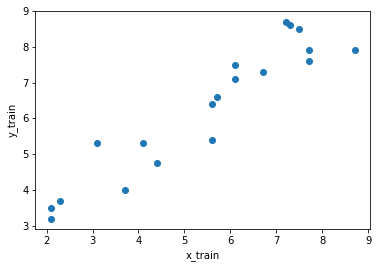

In [2]:
x_train = np.array([[2.3], [4.4], [3.7], [6.1], [7.3], [2.1],[5.6], [7.7], [8.7], [4.1],

                    [6.7], [6.1], [7.5], [2.1], [7.2],

                    [5.6], [5.7], [7.7], [3.1]], dtype=np.float32)

#xtrain生成矩阵数据

y_train = np.array([[3.7], [4.76], [4.], [7.1], [8.6], [3.5],[5.4], [7.6], [7.9], [5.3],

                    [7.3], [7.5], [8.5], [3.2], [8.7],

                    [6.4], [6.6], [7.9], [5.3]], dtype=np.float32)
plt.figure() 
#画图散点图
plt.scatter(x_train,y_train)
plt.xlabel('x_train')
#x轴名称
plt.ylabel('y_train')
#y轴名称
#显示图片
plt.show()

In [3]:
# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(input_size, output_size)

In [4]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

In [5]:
# Train the Model 
for epoch in range(num_epochs):
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))

    # Forward + Backward + Optimize
    optimizer.zero_grad()  
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [%d/%d], Loss: %.4f' %(epoch+1, num_epochs, loss.data.item()))

Epoch [5/1000], Loss: 67.2495
Epoch [10/1000], Loss: 32.9390
Epoch [15/1000], Loss: 16.2488
Epoch [20/1000], Loss: 8.1298
Epoch [25/1000], Loss: 4.1802
Epoch [30/1000], Loss: 2.2589
Epoch [35/1000], Loss: 1.3242
Epoch [40/1000], Loss: 0.8694
Epoch [45/1000], Loss: 0.6481
Epoch [50/1000], Loss: 0.5404
Epoch [55/1000], Loss: 0.4879
Epoch [60/1000], Loss: 0.4623
Epoch [65/1000], Loss: 0.4498
Epoch [70/1000], Loss: 0.4436
Epoch [75/1000], Loss: 0.4405
Epoch [80/1000], Loss: 0.4389
Epoch [85/1000], Loss: 0.4381
Epoch [90/1000], Loss: 0.4376
Epoch [95/1000], Loss: 0.4373
Epoch [100/1000], Loss: 0.4370
Epoch [105/1000], Loss: 0.4368
Epoch [110/1000], Loss: 0.4367
Epoch [115/1000], Loss: 0.4365
Epoch [120/1000], Loss: 0.4364
Epoch [125/1000], Loss: 0.4362
Epoch [130/1000], Loss: 0.4360
Epoch [135/1000], Loss: 0.4359
Epoch [140/1000], Loss: 0.4357
Epoch [145/1000], Loss: 0.4356
Epoch [150/1000], Loss: 0.4354
Epoch [155/1000], Loss: 0.4353
Epoch [160/1000], Loss: 0.4351
Epoch [165/1000], Loss: 0

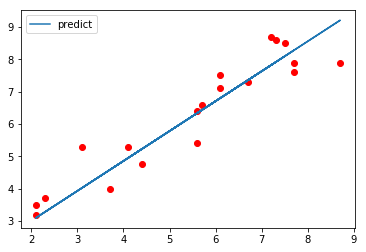

[[2.3]
 [4.4]
 [3.7]
 [6.1]
 [7.3]
 [2.1]
 [5.6]
 [7.7]
 [8.7]
 [4.1]
 [6.7]
 [6.1]
 [7.5]
 [2.1]
 [7.2]
 [5.6]
 [5.7]
 [7.7]
 [3.1]]
tensor([[3.2844],
        [5.2278],
        [4.5800],
        [6.8011],
        [7.9116],
        [3.0993],
        [6.3384],
        [8.2818],
        [9.2073],
        [4.9502],
        [7.3564],
        [6.8011],
        [8.0967],
        [3.0993],
        [7.8191],
        [6.3384],
        [6.4309],
        [8.2818],
        [4.0247]], grad_fn=<AddmmBackward>)


In [6]:
# Plot the graph

model.eval()
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'ro')
plt.plot(x_train, predicted, label='predict')
plt.legend()
plt.show()
print(x_train)
print(model(Variable(torch.from_numpy(x_train))))

## 2. Logistic Regression

In [7]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable


# Hyper Parameters 
input_size = 784
num_classes = 10
num_epochs = 10
batch_size = 50
learning_rate = 0.001

# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [8]:
# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        out = self.linear(x)
        return out


model = LogisticRegression(input_size, num_classes)

In [9]:
# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [10]:
# Training the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
                   % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data.item()))

Epoch: [1/10], Step: [100/1200], Loss: 2.1831
Epoch: [1/10], Step: [200/1200], Loss: 2.1507
Epoch: [1/10], Step: [300/1200], Loss: 2.0765
Epoch: [1/10], Step: [400/1200], Loss: 1.9321
Epoch: [1/10], Step: [500/1200], Loss: 1.9303
Epoch: [1/10], Step: [600/1200], Loss: 1.8002
Epoch: [1/10], Step: [700/1200], Loss: 1.6758
Epoch: [1/10], Step: [800/1200], Loss: 1.7074
Epoch: [1/10], Step: [900/1200], Loss: 1.6424
Epoch: [1/10], Step: [1000/1200], Loss: 1.6328
Epoch: [1/10], Step: [1100/1200], Loss: 1.5840
Epoch: [1/10], Step: [1200/1200], Loss: 1.4793
Epoch: [2/10], Step: [100/1200], Loss: 1.4027
Epoch: [2/10], Step: [200/1200], Loss: 1.5436
Epoch: [2/10], Step: [300/1200], Loss: 1.2832
Epoch: [2/10], Step: [400/1200], Loss: 1.3679
Epoch: [2/10], Step: [500/1200], Loss: 1.3373
Epoch: [2/10], Step: [600/1200], Loss: 1.3346
Epoch: [2/10], Step: [700/1200], Loss: 1.2112
Epoch: [2/10], Step: [800/1200], Loss: 1.2671
Epoch: [2/10], Step: [900/1200], Loss: 1.1575
Epoch: [2/10], Step: [1000/1200

In [11]:
# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

# Save the Model
torch.save(model.state_dict(), 'model.pkl')

Accuracy of the model on the 10000 test images: 87 %
